In [2]:
import pandas as pd,numpy as np,seaborn as sns

In [3]:
titan = sns.load_dataset("titanic")
titan = titan[['age','fare','pclass','survived']]

<AxesSubplot:xlabel='fare', ylabel='Density'>

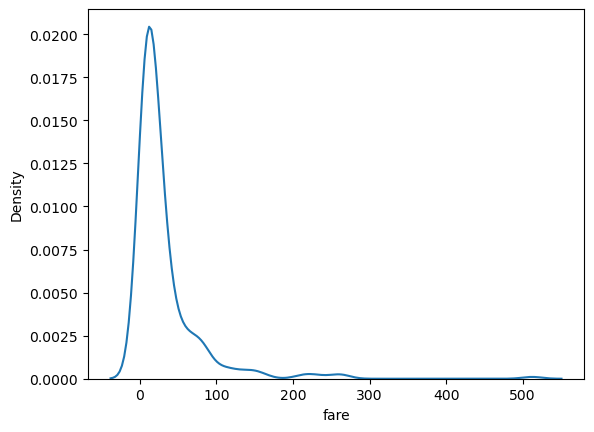

In [4]:
sns.kdeplot(titan['fare'])

Z-Score Standardization

In [5]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(titan)
titan_scaled = norm.transform(titan)

In [8]:
titan_scaled = pd.DataFrame(titan_scaled,columns=titan.columns)

In [9]:
titan_scaled.head()

,age,fare,pclass,survived
0,-0.530377,-0.502445,0.827377,-0.789272
1,0.571831,0.786845,-1.566107,1.266990
2,-0.254825,-0.488854,0.827377,1.266990
3,0.365167,0.420730,-1.566107,1.266990
4,0.365167,-0.486337,0.827377,-0.789272


<AxesSubplot:xlabel='fare', ylabel='Density'>

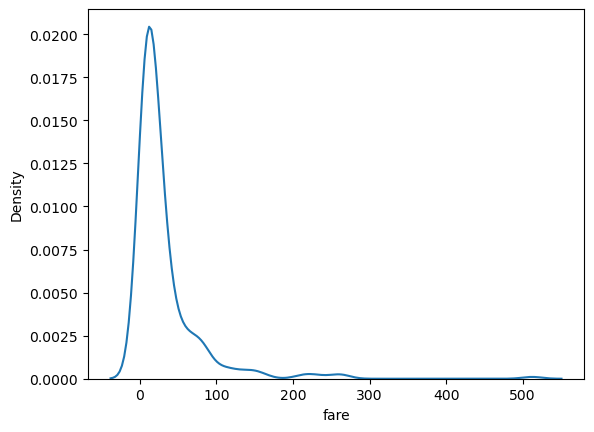

In [10]:
sns.kdeplot(titan['fare'])

<AxesSubplot:xlabel='fare', ylabel='Density'>

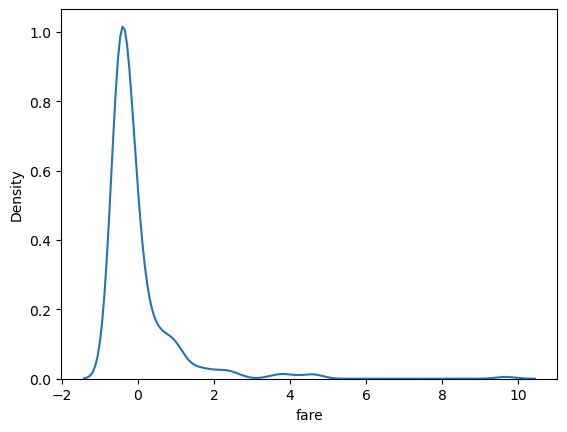

In [11]:
sns.kdeplot(titan_scaled['fare'])

Min/Max Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(titan)
titan2_scaled = scaler.transform(titan)

In [14]:
titan2_scaled = pd.DataFrame(titan2_scaled,columns=titan.columns)

In [15]:
titan2_scaled.head()

,age,fare,pclass,survived
0,0.271174,0.014151,1.0,0.0
1,0.472229,0.139136,0.0,1.0
2,0.321438,0.015469,1.0,1.0
3,0.434531,0.103644,0.0,1.0
4,0.434531,0.015713,1.0,0.0


Mean Normalization

In [17]:
mean_titan = titan.mean(axis=0)
mean_titan

age         29.699118
fare        32.204208
pclass       2.308642
survived     0.383838
dtype: float64

In [18]:
range_titan = titan.max(axis=0) - titan.min(axis=0)

In [19]:
range_titan

age          79.5800
fare        512.3292
pclass        2.0000
survived      1.0000
dtype: float64

In [20]:
titan3_scaled = (titan-mean_titan)/range_titan

In [21]:
titan3_scaled.head()

,age,fare,pclass,survived
0,-0.096747,-0.048707,0.345679,-0.383838
1,0.104309,0.076277,-0.654321,0.616162
2,-0.046483,-0.047390,0.345679,0.616162
3,0.066611,0.040786,-0.654321,0.616162
4,0.066611,-0.047146,0.345679,-0.383838


<AxesSubplot:xlabel='age', ylabel='Density'>

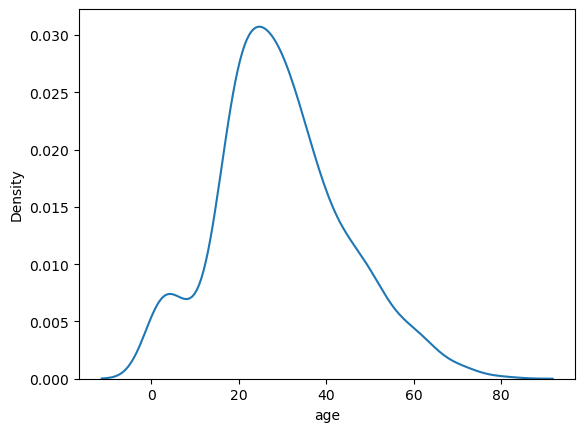

In [22]:
sns.kdeplot(titan['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

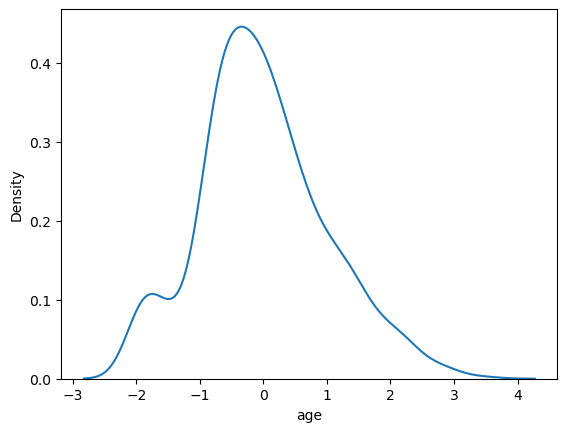

In [23]:
sns.kdeplot(titan_scaled['age'])

Maximum Absolute Scaling

In [25]:
from sklearn.preprocessing import MaxAbsScaler
scaled = MaxAbsScaler()
titan4_scaled=scaled.fit_transform(titan)

In [26]:
titan4_scaled = pd.DataFrame(titan4_scaled,columns=titan.columns)

In [27]:
titan4_scaled.head()

,age,fare,pclass,survived
0,0.2750,0.014151,1.000000,0.0
1,0.4750,0.139136,0.333333,1.0
2,0.3250,0.015469,1.000000,1.0
3,0.4375,0.103644,0.333333,1.0
4,0.4375,0.015713,1.000000,0.0


In [28]:
titan4_scaled.to_csv("MyDataScaled.csv",index=False)

In [29]:
data = pd.read_csv("sample_data_for_scaling.csv")

In [30]:
data.head()

,ID,Feature_1,Feature_2,Feature_3
0,1,37.454012,14.203165,873
1,2,95.071431,-41.586004,798
2,3,73.199394,-33.837129,273
3,4,59.865848,39.855419,881
4,5,15.601864,10.642906,62


In [31]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,48.400623,0.437514,466.880000
std,57.879185,29.489143,29.300119,288.197806
min,1.000000,0.552212,-49.493842,1.000000
25%,50.750000,22.858241,-23.853750,200.750000
50%,100.500000,49.448625,4.163988,448.000000
75%,150.250000,75.685962,24.219931,706.500000
max,200.000000,98.688694,49.050514,973.000000


<AxesSubplot:xlabel='Feature_1', ylabel='Density'>

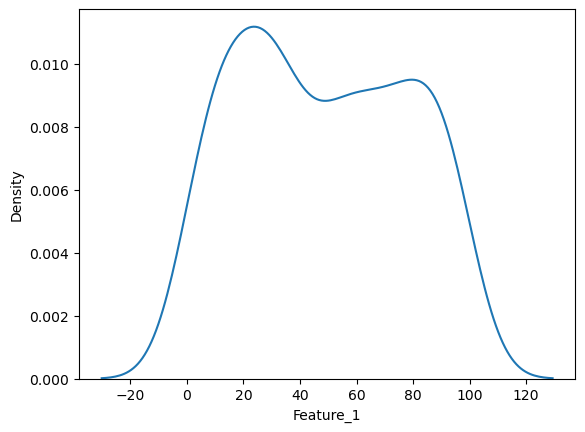

In [32]:
sns.kdeplot(data['Feature_1'])

<AxesSubplot:xlabel='Feature_2', ylabel='Density'>

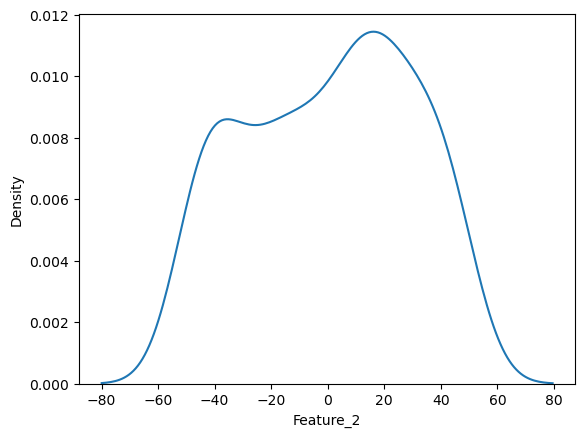

In [33]:
sns.kdeplot(data['Feature_2'])

<AxesSubplot:xlabel='Feature_3', ylabel='Density'>

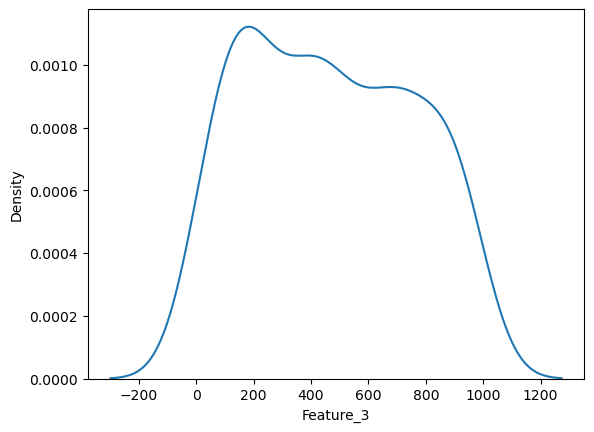

In [34]:
sns.kdeplot(data['Feature_3'])

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
Scaled_Data = scaled.fit_transform(data)


In [36]:
Scaled_Data = pd.DataFrame(Scaled_Data,columns=data.columns)

In [37]:
Scaled_Data.head()

,ID,Feature_1,Feature_2,Feature_3
0,0.000000,0.376025,0.646379,0.897119
1,0.005025,0.963140,0.080246,0.819959
2,0.010050,0.740267,0.158880,0.279835
3,0.015075,0.604399,0.906691,0.905350
4,0.020101,0.153354,0.610251,0.062757


In [38]:
Health = pd.read_excel("health_insurance_data(1).xlsx")

In [40]:
Health = Health[["Age","Annual_Income","BMI","Children","Claim_Amount"]]

In [41]:
Health.describe()

,Age,Annual_Income,BMI,Children,Claim_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,51.090000,83753.969808,30.083057,2.420000,24928.877223
std,20.564445,37286.579897,8.908376,1.654475,13634.504122
min,18.000000,20602.162991,15.329875,0.000000,61.591758
25%,34.000000,49651.667781,22.465545,1.000000,14579.480608
50%,50.000000,83668.011849,29.877863,2.000000,25665.276825
75%,69.250000,115992.792793,38.023787,4.000000,35388.510282
max,85.000000,149593.652740,44.938023,5.000000,49606.665817


<AxesSubplot:xlabel='Age', ylabel='Density'>

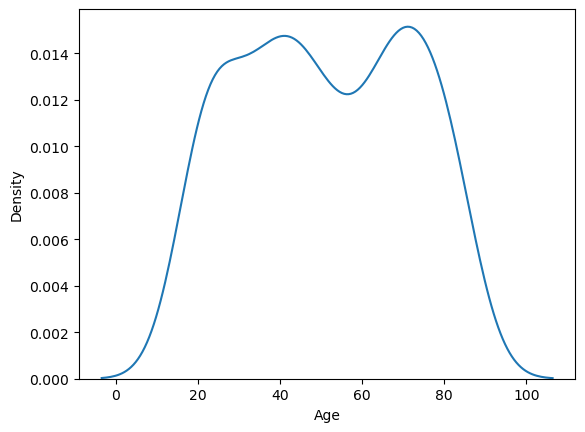

In [42]:
sns.kdeplot(Health['Age'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

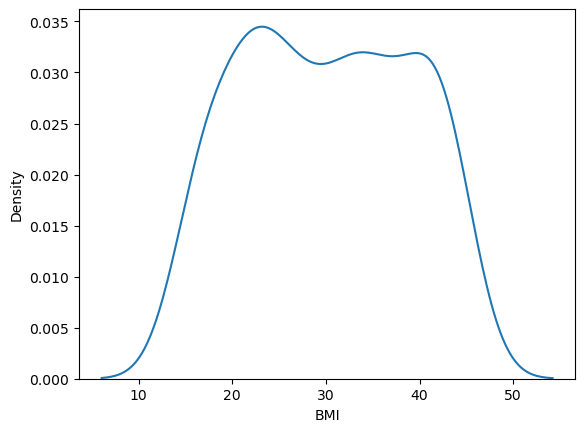

In [43]:
sns.kdeplot(Health['BMI'])